In [2]:
# Data-preprocessing libraries needed

import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from pandasql import sqldf


In [3]:
# We load the data in lowercase for better data processing

df1 = pd.read_csv("/Users/mdredowanaminmollick/Desktop/720 capstone/complete laptop data0.csv", encoding= 'unicode_escape').apply(lambda x: x.astype(str).str.lower())
df1

# Latest data --> Last week's data from flipkart's laptop catalogue

,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,...,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 17 core i9 12th gen - (32 ...,5.0,"?2,34,990","laptop, power adaptor, user guide, warranty do...",g733zw-ll139ws,90nr08g2-m007s0,g733zw-ll139ws,rog strix scar 17,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,asus rog strix scar 15 core i9 12th gen - (32 ...,nan,"?2,29,990","laptop, power adaptor, user guide, warranty do...",g533zw-ln136ws,90nr0872-m007l0,g533zw-ln136ws,rog strix scar 15,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,hp victus ryzen 7 octa core 5800h - (16 gb/512...,nan,"?1,04,091","laptop, battery, adapter, cables and user manuals",16-e0351ax,552x1pa#acj,16-e0351ax,victus,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,3,https://www.flipkart.com/lenovo-ideapad-gaming...,lenovo ideapad gaming 3i ryzen 7 octa core r7-...,nan,"?87,717","laptop, power adaptor, user guide, warranty do...",15ach6,82k201rsin,ideapad gaming 3,ideapad gaming 3i,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4,https://www.flipkart.com/lenovo-yoga-slim-7-co...,lenovo yoga slim 7 core i5 11th gen - (16 gb/5...,nan,"?75,990","laptop, adaptor",82a300mbin,1ls2b001653,yoga slim 7 14itl05,yoga slim 7,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,https://www.flipkart.com/nokia-purebook-x14-co...,nokia purebook x14 core i5 10th gen - (8 gb/51...,4.4,"?53,990","laptop, power adaptor, user guide with warrant...",nki510ul85s,nki510ul85s,nan,purebook x14,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
980,980,https://www.flipkart.com/hp-spectre-folio-core...,hp spectre folio core i7 10th gen - (16 gb/512...,nan,"?2,39,759","laptop, power adaptor, user guide, warranty do...",13-ak1004tu,3p296pa,nan,spectre folio,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
981,981,https://www.flipkart.com/hp-envy-x360-ryzen-5-...,hp envy x360 ryzen 5 hexa core 4500u - (8 gb/5...,nan,"?85,555","laptop, power adaptor, user guide, warranty do...",13-ay0078au,17j58pa,nan,envy x360,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
982,982,https://www.flipkart.com/hp-14a-celeron-dual-c...,hp 14a celeron dual core - (4 gb/64 gb emmc st...,3.6,"?26,990","laptop, power adaptor, user guide, warranty do...",14a- na0002tu,2z326pa,nan,14a,...,nan,nan,nan,nan,nan,nan,nan,nan,64 gb,nan


In [4]:
df2 = df1.copy()
df2.describe().T

,count,unique,top,freq
Unnamed: 0,984,984,0,1
link,984,984,https://www.flipkart.com/asus-rog-strix-scar-1...,1
name,984,940,asus rog strix scar 17 core i9 12th gen - (32 ...,2
user rating,984,29,nan,294
Price,984,433,"?40,990",16
...,...,...,...,...
Firewire Port,984,2,nan,950
RJ11,984,2,nan,943
Read/Write Speed,984,3,nan,980
EMMC Storage Capacity,984,5,nan,960


In [5]:
df1.columns, len(df1.columns)

(Index(['Unnamed: 0', 'link', 'name', 'user rating', 'Price', 'Sales Package',
        'Model Number', 'Part Number', 'Model Name', 'Series', 'Color', 'Type',
        'Suitable For', 'Power Supply', 'Battery Cell', 'MS Office Provided',
        'Dedicated Graphic Memory Type', 'Dedicated Graphic Memory Capacity',
        'Processor Brand', 'Processor Name', 'Processor Generation', 'SSD',
        'SSD Capacity', 'RAM', 'RAM Type', 'Processor Variant', 'Clock Speed',
        'Expandable Memory', 'Cache', 'Graphic Processor', 'Number of Cores',
        'OS Architecture', 'Operating System', 'Supported Operating System',
        'Mic In', 'USB Port', 'HDMI Port', 'Touchscreen', 'Screen Size',
        'Screen Resolution', 'Screen Type', 'Speakers', 'Internal Mic',
        'Sound Properties', 'Wireless LAN', 'Bluetooth', 'Dimensions', 'Weight',
        'Disk Drive', 'Finger Print Sensor', 'Keyboard', 'Backlit Keyboard',
        'Additional Features', 'Warranty Summary', 'Warranty Service Typ

# Data cleaning and preprocessing

In [6]:
# Deleting some unwanted features

del df1["Dock Port"]
del df1["Firewire Port"]
del df1["Optane Memory"]
del df1["RJ11"]
del df1["Lock Port"]
del df1["Color Gamut"]
del df1["S-video"]
del df1["Laptop Bag"]
del df1["RPM"]
del df1["Antivirus"]
del df1["Stylus Included"]
del df1["TGP"]
del df1["VGA Port"]
del df1["Security Chip"]
del df1["RJ45"]
del df1["Keyboard"]
del df1["Cache"]
del df1["Hardware Interface"]
del df1["Bluetooth"]
del df1["Other Accessories"]
del df1["Inbuilt 4G LTE"]
del df1["Domestic Warranty"]
del df1["International Warranty"]
del df1["Included Software"]
del df1["Internal Mic"]
del df1["MS Office Provided"]
del df1["Wireless LAN"]
del df1["Wireless WAN"]
del df1["Mic In"]
del df1["Cloud Storage"]
del df1["Dimensions"]
del df1["HDMI Port"]
del df1["Sound Properties"]
del df1["Sound Chip"]
del df1["Speakers"]
del df1["Additional Features"]
del df1["USB Port"]
del df1["Multi Card Slot"]
del df1["Unnamed: 0"]
del df1["Not Covered in Warranty"]
del df1["Covered in Warranty"]
del df1["Warranty Service Type"]
del df1["Warranty Summary"]
del df1["Ethernet"]
del df1["Pointer Device"]
del df1["RAM Frequency"]
del df1["Recovery Options"]
del df1["NFC Support"]
del df1["link"]
del df1["user rating"]
del df1["Model Number"]
del df1["Memory Slots"]
del df1["Part Number"]
del df1["Suitable For"]

In [17]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mdredowanaminmollick/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
from nltk.tokenize import word_tokenize

brand_name = []
for i in range(df1.shape[0]):
    arr = word_tokenize(df1["name"][i])
    brand_name.append(arr[0])     

In [22]:
brand = np.array(brand_name)

In [23]:
np.unique(brand)

array(['acer', 'apple', 'asus', 'avita', 'dell', 'hp', 'infinix',
       'lenovo', 'lg', 'mi', 'msi', 'nokia', 'realme', 'redmibook',
       'samsung', 'vaio'], dtype='<U9')

In [14]:
df1[df1["Dedicated Graphic Memory Capacity"] == "nan"].shape

(674, 44)

In [24]:
# Function for encoding categorical string data into integers

def encode_to_int(arr):
    d = {}
    for p in enumerate(arr):
        if p[1] not in d:
            d[p[1]] = p[0]+1
        
    return d

In [26]:
req = df1["Screen Resolution"]
max_screen_res = list(req)

for i in range(len(max_screen_res)):
    res =" ".join(re.split(r'\D+',max_screen_res[i])).split()
    if len(res)==1:
        max_screen_res[i]=int(res[0])
    else:
        max_screen_res[i]=min(int(res[0]),int(res[1]))
        
for i in range(len(max_screen_res)):
    if max_screen_res[i]>=2160:
        max_screen_res[i]=2160
    elif max_screen_res[i]>=1440:
        max_screen_res[i]=1440
    elif max_screen_res[i]>=1080:
        max_screen_res[i]=1080
    elif max_screen_res[i]>=720:
        max_screen_res[i]=720
    else:
        max_screen_res[i]=480

In [27]:
df1["max_res"] = pd.DataFrame(max_screen_res)

In [28]:
del df1["Screen Resolution"]

In [29]:
def gpu_comp(s):
    
    if s == "nan":
        return "none"
    
    sr = s.split(" ")
    
    if sr[0] == "na":
        return "none"
    
    for ele in sr:
        if ele == "integrated":
            return "none"   
    return sr[0]

In [30]:
df1["gpu_brand"] = df1["Graphic Processor"].apply(gpu_comp)

In [31]:
gpu_brand_dict = encode_to_int(list(df1["gpu_brand"].unique())) 

def func0(s):
    return gpu_brand_dict[s]

df1["gpu_brand"] = df1["gpu_brand"].apply(func0)

In [32]:
gpu_brand_dict

{'nvidia': 1, 'none': 2, 'amd': 3, 'qualcomm': 4}

In [33]:
inv_gpub_dict = {v: k for k, v in gpu_brand_dict.items()}
inv_gpub_dict

{1: 'nvidia', 2: 'none', 3: 'amd', 4: 'qualcomm'}

In [34]:
def func1(s):
    return type_dict[s]

print(df1["Type"].unique())
## No nan values in the given column

type_dict = encode_to_int(df1["Type"].unique())

df1["Type"] = df1["Type"].apply(func1)
df1["Type"].unique()


['gaming laptop' 'thin and light laptop' '2 in 1 laptop' 'notebook'
 'laptop' '2 in 1 gaming laptop' 'business laptop' 'chromebook'
 'creator laptop']


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
inv_type_dict = {v: k for k, v in type_dict.items()}
inv_type_dict

{1: 'gaming laptop',
 2: 'thin and light laptop',
 3: '2 in 1 laptop',
 4: 'notebook',
 5: 'laptop',
 6: '2 in 1 gaming laptop',
 7: 'business laptop',
 8: 'chromebook',
 9: 'creator laptop'}

In [36]:
def brand(s):
    sr = s.split(" ")
    brand_name = sr[0].lower()
    return brand_name

df1["company"] = df1["name"].apply(brand)

In [37]:
df1["company"].unique()

array(['asus', 'hp', 'lenovo', 'dell', 'msi', 'realme', 'avita', 'acer',
       'samsung', 'infinix', 'lg', 'apple', 'nokia', 'redmibook', 'mi',
       'vaio'], dtype=object)

In [38]:
def func00(s):
    return company_dict[s]

company_dict = encode_to_int(df1["company"].unique())

df1["company"] = df1["company"].apply(func00)
df1["company"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [39]:
df1[df1["Weight"] == 0]

,name,Price,Sales Package,Model Name,Series,Color,Type,Power Supply,Battery Cell,Dedicated Graphic Memory Type,...,Brightness,Face Recognition,System Architecture,Refresh Rate,HDD Capacity,Read/Write Speed,EMMC Storage Capacity,max_res,gpu_brand,company


In [40]:
del df1["Power Supply"]
del df1["Sales Package"]
del df1["Model Name"]
del df1["Battery Cell"]
del df1["Color"]
del df1["Processor Variant"]
del df1["Supported Operating System"]
del df1["Screen Type"]
del df1["Disk Drive"]
del df1["Backlit Keyboard"]
del df1["Chipset"]
del df1["Brightness"]
del df1["System Architecture"]
del df1["Read/Write Speed"]
del df1["Clock Speed"]
del df1["Series"]

In [41]:
df1["SSD Capacity"] = df1["SSD Capacity"].replace("nan", 0)
df1["SSD Capacity"].unique()

array(['1 tb', '512 gb', '256 gb', '128 gb', 0, '2 tb'], dtype=object)

In [42]:
df1["HDD Capacity"].unique()

df1["HDD Capacity"] = df1["HDD Capacity"].replace("nan", 0)
df1["HDD Capacity"].unique()

array([0, '512 gb', '1 tb'], dtype=object)

In [43]:
df1["SSD Capacity"][0].split(" ")

['1', 'tb']

In [44]:
for i in range(df1.shape[0]):
    if(df1["SSD Capacity"][i]== 0):
        df1["SSD Capacity"][i] = 0
        continue
    else:
        x = df1["SSD Capacity"][i].split(" ")
        if(x[1] == "tb"):
            df1["SSD Capacity"][i] = int(x[0])*1000
        else:
            df1["SSD Capacity"][i] = int(x[0])

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2583597028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SSD Capacity"][i] = int(x[0])*1000
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2583597028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SSD Capacity"][i] = int(x[0])
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2583597028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [45]:
# df1["EMMC Storage Capacity"]

for i in range(df1.shape[0]):
    if(df1["EMMC Storage Capacity"][i]== "nan"):
        df1["EMMC Storage Capacity"][i] = 0
        continue
    else:
        x = df1["EMMC Storage Capacity"][i].split(" ")
        df1["EMMC Storage Capacity"][i] = int(x[0])

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/4056575979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["EMMC Storage Capacity"][i] = 0
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/4056575979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["EMMC Storage Capacity"][i] = int(x[0])


In [46]:
df1["SSD Capacity"].unique()

array([1000, 512, 256, 128, 0, 2000], dtype=object)

In [47]:
for i in range(df1.shape[0]):
    if(df1["HDD Capacity"][i]== 0):
        df1["HDD Capacity"][i] = 0
        continue
    else:
        x = df1["HDD Capacity"][i].split(" ")
        if(x[1] == "tb"):
            df1["HDD Capacity"][i] = int(x[0])*1000
        else:
            df1["HDD Capacity"][i] = int(x[0])
        

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3733312581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["HDD Capacity"][i] = 0
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3733312581.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["HDD Capacity"][i] = int(x[0])
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3733312581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [48]:
df1["HDD Capacity"].unique()

array([0, 512, 1000], dtype=object)

In [49]:
df1.columns


Index(['name', 'Price', 'Type', 'Dedicated Graphic Memory Type',
       'Dedicated Graphic Memory Capacity', 'Processor Brand',
       'Processor Name', 'Processor Generation', 'SSD', 'SSD Capacity', 'RAM',
       'RAM Type', 'Expandable Memory', 'Graphic Processor', 'Number of Cores',
       'OS Architecture', 'Operating System', 'Touchscreen', 'Screen Size',
       'Weight', 'Finger Print Sensor', 'Web Camera', 'Battery Backup',
       'Face Recognition', 'Refresh Rate', 'HDD Capacity',
       'EMMC Storage Capacity', 'max_res', 'gpu_brand', 'company'],
      dtype='object')

In [50]:
df1["Storage"] = df1["HDD Capacity"] + df1["SSD Capacity"] + df1["EMMC Storage Capacity"]

In [51]:
del df1["SSD Capacity"]
del df1["HDD Capacity"]
del df1["EMMC Storage Capacity"]

In [52]:
df1["Storage"].iloc[265] = 1000

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3399657821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Storage"].iloc[265] = 1000


In [53]:
del df1["Web Camera"]

In [54]:
def ls(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

In [55]:
for i in range(df1.shape[0]):
    x = df1["Price"][i].split("?")
    y = ls(x[1])
    y = y.split(",")
    temp = ""
    rate = temp.join(y)
    
    df1["Price"][i] = int(rate)

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/4084947513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Price"][i] = int(rate)


In [56]:
df1["Price"].unique().shape

(433,)

In [57]:
df1["Dedicated Graphic Memory Type"].unique()


array(['gddr6', 'nan', 'ddr4', 'gddr3', 'gddr5', 'ddr5'], dtype=object)

In [58]:
del df1["Dedicated Graphic Memory Type"]

In [59]:
df1["Type"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
df1["Dedicated Graphic Memory Capacity"] = df1["Dedicated Graphic Memory Capacity"].replace("nan", 0)

In [61]:
def gpu_mem(s):
    
    if s == 0:
        return 0
    s = s.split(' ')
#     print(s)
    
    if s[1] == "gb":
        return int(s[0])*1024
    
    if s[1] == "mb":
        return int(s[0])

In [62]:
df1["Dedicated Graphic Memory Capacity"] = df1["Dedicated Graphic Memory Capacity"].apply(gpu_mem)

In [63]:
df1["Dedicated Graphic Memory Capacity"].unique()

array([ 8192,  4096,     0,  6144,  2048, 16384,   128, 10240,   512,
       12288])

In [64]:
processor_names = df1["Processor Brand"].astype(str) +" "+ df1["Processor Name"].astype(str) +" "+df1["Processor Generation"].astype(str)

In [65]:
processor_names = list(processor_names.unique())

In [66]:
final_proc_names = []
for i in range(len(processor_names)):
    pres_str = processor_names[i]
    if pres_str.endswith("nan"):
        temp_str = pres_str[:-4]
        final_proc_names.append(temp_str)
        
    else:
        final_proc_names.append(pres_str)

In [67]:
df1["Processor Brand"].unique()

array(['intel', 'amd', 'qualcomm', 'apple', 'mediatek'], dtype=object)

In [68]:
processor_brand_dict = encode_to_int(list(df1["Processor Brand"].unique())) 
def func2(s):
    return processor_brand_dict[s]
df1["Processor Brand"] = df1["Processor Brand"].apply(func2)

In [69]:
processor_name_dict = encode_to_int(list(df1["Processor Name"].unique())) 
def func3(s):
    return processor_name_dict[s]
df1["Processor Name"] = df1["Processor Name"].apply(func3)


In [70]:
df1["Processor Generation"].unique()

array(['12th gen', 'nan', '5th gen', '11th gen', '10th gen', '7th gen',
       '3rd gen', '9th gen', '4th gen', '8th gen'], dtype=object)

In [71]:
df1["SSD"].unique()

array(['yes', 'no'], dtype=object)

In [72]:
for i in range(df1.shape[0]):
    if(df1["SSD"][i] == "yes"):
        df1["SSD"][i] = 1
    else:
        df1["SSD"][i] = 0

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/71129127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SSD"][i] = 1
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/71129127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SSD"][i] = 0


In [73]:
df1["SSD"].unique()

array([1, 0], dtype=object)

In [74]:
del df1["RAM Type"]

In [75]:
for i in range(df1.shape[0]):
    x = df1["RAM"][i].split(" ")
    df1["RAM"][i] = int(x[0])

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3299221052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["RAM"][i] = int(x[0])


In [76]:
df1["RAM"].unique()

array([32, 16, 4, 8], dtype=object)

In [77]:
for i in range(df1.shape[0]):
    if(df1["Expandable Memory"][i] == "nan"):
        df1["Expandable Memory"][i] = 0
    else:
        df1["Expandable Memory"][i] = 1

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/810842835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Expandable Memory"][i] = 1
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/810842835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Expandable Memory"][i] = 0


In [78]:
df1["Expandable Memory"].unique()

array([1, 0], dtype=object)

In [79]:
df1.columns

Index(['name', 'Price', 'Type', 'Dedicated Graphic Memory Capacity',
       'Processor Brand', 'Processor Name', 'Processor Generation', 'SSD',
       'RAM', 'Expandable Memory', 'Graphic Processor', 'Number of Cores',
       'OS Architecture', 'Operating System', 'Touchscreen', 'Screen Size',
       'Weight', 'Finger Print Sensor', 'Battery Backup', 'Face Recognition',
       'Refresh Rate', 'max_res', 'gpu_brand', 'company', 'Storage'],
      dtype='object')

In [80]:
del df1["Number of Cores"]

In [81]:
df1[df1["OS Architecture"] == "nan"]
del df1["OS Architecture"]

In [82]:
df1["Operating System"]

0      windows 11 home
1      windows 11 home
2      windows 11 home
3      windows 11 home
4      windows 11 home
            ...       
979    windows 10 home
980    windows 10 home
981     windows 10 pro
982             chrome
983     windows 10 pro
Name: Operating System, Length: 984, dtype: object

In [83]:
df1["Operating System"].unique()

for i in range(df1.shape[0]):
    x = df1["Operating System"][i].split(" ")
    if(x[0] == "Windows" or x[0] == "windows"):
        df1["Operating System"][i] = "windows"
    if(x[0] == "mac"):
        df1["Operating System"][i] = "mac"

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2937846803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Operating System"][i] = "windows"
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2937846803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Operating System"][i] = "mac"


In [84]:
df1["Operating System"].unique()

array(['windows', 'chrome', 'dos', 'mac', 'ubuntu'], dtype=object)

In [85]:
def func3(s):
    return os_dict[s]

In [86]:
os_dict = encode_to_int(list(df1["Operating System"].unique())) 
df1["Operating System"] = df1["Operating System"].apply(func3)


In [87]:
df1["Operating System"].unique()

array([1, 2, 3, 4, 5])

In [88]:
df1["Type"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
df1.columns

Index(['name', 'Price', 'Type', 'Dedicated Graphic Memory Capacity',
       'Processor Brand', 'Processor Name', 'Processor Generation', 'SSD',
       'RAM', 'Expandable Memory', 'Graphic Processor', 'Operating System',
       'Touchscreen', 'Screen Size', 'Weight', 'Finger Print Sensor',
       'Battery Backup', 'Face Recognition', 'Refresh Rate', 'max_res',
       'gpu_brand', 'company', 'Storage'],
      dtype='object')

In [90]:
df1["Touchscreen"].unique()

array(['no', 'yes'], dtype=object)

In [91]:
for i in range(df1.shape[0]):
    if(df1["Touchscreen"][i] == "no"):
        df1["Touchscreen"][i] = 0
    else:
        df1["Touchscreen"][i] = 1

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3219095053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Touchscreen"][i] = 0
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3219095053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Touchscreen"][i] = 1


In [92]:
df1["Screen Size"].unique()

array(['43.94 cm (17.3 inch)', '39.62 cm (15.6 inch)',
       '40.89 cm (16.1 inch)', '35.56 cm (14 inch)',
       '33.78 cm (13.3 inch)', '34.04 cm (13.4 inch)',
       '39.62 cm (15.6 inches)', '35.81 cm (14.1 inch)',
       '42.16 cm (16.6 inch)', '29.46 cm (11.6 inch)',
       '40.64 cm (16 inch)', '38.0 cm (14.96 cm)', '38.0 cm (14.96 inch)',
       '36.12 cm (14.22 inch)', '38.1 cm (15 inch)',
       '34.29 cm (13.5 inch)', '35.56 cm (14 inches)',
       '30.48 cm (12 inch)', '36.07 cm (14.2 inch)', '33.02 cm (13 inch)',
       '43.94 cm (17.3 inches)', '33.78 cm (13.3 inches)',
       '38.86 cm (15.3 inch)', '34.04 cm (13.4 inches)',
       '37.85 cm (14.9 inch)', '36.83 cm (14.5 inch)',
       '34.54 cm (13.6 inch)'], dtype=object)

In [93]:
for i in range(df1.shape[0]):
    x = df1["Screen Size"][i].split(" ")
    y = x[2]
    size = y.split("(")
    df1["Screen Size"][i] = float(size[1])

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/268545802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Screen Size"][i] = float(size[1])


In [94]:
df1["Screen Size"].unique()

array([17.3, 15.6, 16.1, 14.0, 13.3, 13.4, 14.1, 16.6, 11.6, 16.0, 14.96,
       14.22, 15.0, 13.5, 12.0, 14.2, 13.0, 15.3, 14.9, 14.5, 13.6],
      dtype=object)

In [95]:
df1["Screen Size"]

0      17.3
1      15.6
2      16.1
3      15.6
4      14.0
       ... 
979    14.0
980    13.3
981    13.3
982    14.0
983    14.0
Name: Screen Size, Length: 984, dtype: object

In [96]:
del df1["Face Recognition"]


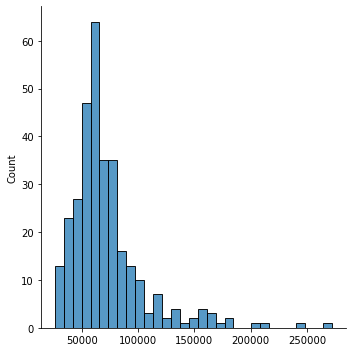

In [97]:
p_fs = np.array(df1[df1["Finger Print Sensor"] == "yes"]["Price"])
sns.displot(p_fs)
plt.show()


In [98]:
del df1["Finger Print Sensor"]


In [99]:
df1["Weight"] = df1["Weight"].replace("nan", "0")
df1["Weight"] = df1["Weight"].replace("dual array microphone kg", "0")

def wt_func(s):
    
    if s != "0":
        ss = s.split("$$")
        if len(ss) >= 2:
            return float(ss[0])
        
        sr = s.split(" ")
        if len(sr) >= 2:
            return float(sr[0])
        
    else:
        return 0
            
        
df1["Weight"] = df1["Weight"].apply(wt_func)


In [100]:
df_wtna = df1[df1["Weight"] == 0]
print(df_wtna["Type"].unique())

na_wtna_arr = list(df_wtna["Type"].unique())

wt_dic = {}

for i in range(len(na_wtna_arr)):
    curr_type_wt = np.array(df1[df1["Type"] == na_wtna_arr[i]]["Weight"])
    curr_mean = curr_type_wt.mean()
    
    wt_dic[na_wtna_arr[i]] = curr_mean
    
print(wt_dic)


[2 1 5 3 7 4]
{2: 1.4946421471172964, 1: 2.0686486486486486, 5: 0.9746666666666668, 3: 1.34171875, 7: 0.8, 4: 1.6219999999999999}


In [101]:
inv_type_dict

{1: 'gaming laptop',
 2: 'thin and light laptop',
 3: '2 in 1 laptop',
 4: 'notebook',
 5: 'laptop',
 6: '2 in 1 gaming laptop',
 7: 'business laptop',
 8: 'chromebook',
 9: 'creator laptop'}

In [102]:
index = df1[df1["Weight"] == 0].index

dff = df1[df1["Weight"] == 0]["Type"] == 2

indices = index[dff]
indices


Int64Index([  4,   6,  35,  65,  76,  78, 132, 135, 215, 229, 231, 266, 306,
            437, 506, 516, 525, 565, 567, 570, 651, 752, 972],
           dtype='int64')

In [103]:
dwt = df1[df1["Weight"] == 0]
for key in wt_dic.keys():
    index = df1[df1["Weight"] == 0].index
    dff = df1[df1["Weight"] == 0]["Type"] == key
    indices = index[dff]
#     print(indices, "\n")
    
    for i in range(len(list(indices))):
        df1["Weight"].iloc[indices[i]] = wt_dic[key]
        
#     df1.loc[indices]["Weight"] = df1.loc[indices]["Weight"].replace(0, wt_dic[key])

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3065486179.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Weight"].iloc[indices[i]] = wt_dic[key]


In [104]:
df1[df1["Weight"] == 0].shape


(0, 21)

In [105]:
inv_type_dict

{1: 'gaming laptop',
 2: 'thin and light laptop',
 3: '2 in 1 laptop',
 4: 'notebook',
 5: 'laptop',
 6: '2 in 1 gaming laptop',
 7: 'business laptop',
 8: 'chromebook',
 9: 'creator laptop'}

294


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


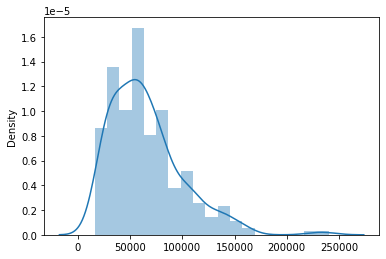

In [106]:
p_gen = np.array(df1[df1["Processor Generation"] == "nan"]["Price"])
print(df1[df1["Processor Generation"] == "nan"].shape[0])
sns.distplot(p_gen)
plt.show()

In [107]:
# As there are a lot of NaN values, we delete this feature

del df1["Processor Generation"]

In [108]:
def bat_back_1(s):
    return 0

In [109]:
df1["battery_back"] = df1["Battery Backup"].apply(bat_back_1)

In [110]:
inv_type_dict

{1: 'gaming laptop',
 2: 'thin and light laptop',
 3: '2 in 1 laptop',
 4: 'notebook',
 5: 'laptop',
 6: '2 in 1 gaming laptop',
 7: 'business laptop',
 8: 'chromebook',
 9: 'creator laptop'}

In [111]:
battery_dict = {1:2, 2:4.5, 3:5, 4:4.5 , 5:5, 6:4, 7:6, 8:8 , 9:4}
battery_dict
print("***Average battery lifes***\n")
for k1 in inv_type_dict.values():
    print(k1, " ===> ", battery_dict[type_dict[k1]])

***Average battery lifes***

gaming laptop  ===>  2
thin and light laptop  ===>  4.5
2 in 1 laptop  ===>  5
notebook  ===>  4.5
laptop  ===>  5
2 in 1 gaming laptop  ===>  4
business laptop  ===>  6
chromebook  ===>  8
creator laptop  ===>  4


In [112]:
df1[df1["battery_back"] == 0].shape

(984, 21)

In [113]:
dwt = df1[df1["battery_back"] == 0]

for key in inv_type_dict.keys():
    index = df1[df1["battery_back"] == 0].index
    dff = df1[df1["battery_back"] == 0]["Type"] == key
    indices = index[dff]
#     print(indices, "\n")
    
    for i in range(len(list(indices))):
        df1["battery_back"].iloc[indices[i]] = battery_dict[key]

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/2653845043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["battery_back"].iloc[indices[i]] = battery_dict[key]


In [114]:
df1[df1["battery_back"] == 0].shape

(0, 21)

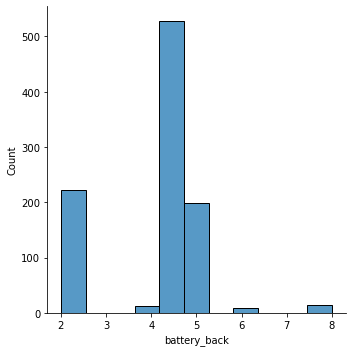

In [115]:
sns.displot(df1["battery_back"])
plt.show()

In [116]:
del df1["Battery Backup"]

In [117]:
# Processed GPU names

new_gpu = ['nvidia geforce rtx 3070 ti', 'nvidia geforce rtx 3050',
       'integrated', 'iris xe',
       'intel hd',
       'amd radeon',
       'nvidia geforce gtx 1650', 'intel uhd',
       'amd radeon', 'intel iris xe',
       'amd radeon',
       'nvidia geforce rtx 3050', 'amd radeon',
       'nvidia geforce rtx 3070', 'intel uhd',
       'nvidia geforce rtx 3050 ti', 'amd radeon vega 8',
       'nvidia geforce rtx 3050', 'nvidia geforce rtx 3060',
       'intel hd',
       'nvidia geforce gtx 1650', 'intel uhd',
       'nvidia geforce rtx 3060', 'nvidia geforce mx 450',
       'amd radeon', 'nvidia geforce rtx 3050',
       'intel uhd 600', 'intel uhd',
       'amd radeon', 'nvidia geforce rtx 3050', 'amd radeon',
       'nvidia geforce rtx 3050 ti', 'amd radeon rx vega 10',
       'nvidia geforce rtx 3050',
       'intel uhd',
       'amd radeon rx vega 10', 'intel hd',
       'qualcomm adreno 618 gpu', 'amd radeon vega ',
       'amd radeon rx 6600m', 'integrated',
       'nvidia geforce gtx 1650',
       'nvidia geforce rtx 3050',
       'nvidia geforce rtx 3060',
       'nvidia geforce rtx 3050',
       'qualcomm adreno', 'integrated',
       'nvidia geforce rtx 3050ti',
       'intel uhd 600',
       'nvidia geforce rtx 3080 ti', 'intel iris plus',
       'amd radeon', 'nvidia geforce gtx',
       'intel uhd 605', 'nvidia geforce rtx',
       'intel uhd',
       'intel uhd 600', 'amd radeon',
       'intel iris xe',
       'amd radeon', 'intel iris',
       'amd radeon', 'intel uhd',
       'nvidia geforce mx 350', 'amd radeon',
       'intel iris xe', 'nvidia geforce mx 330',
       'intel hd', 'amd radeon rx 6700m', 'integrated',
       'nvidia geforce gtx 1650', 'nan',
       'nvidia geforce gtx 1650',
       'amd radeon',
       'nvidia geforce rtx 3060', 'nvidia geforce',
       'nvidia geforce gtx 1650 ti',
       'amd radeon', 'nvidia geforce rtx 3050',
       'intel iris xe', 'amd radeon vega 8',
       'intel uhd',
       'nvidia geforce gtx 1650',
       'amd radeon', 'nvidia geforce rtx 3050ti',
       'nvidia geforce mx 330',
       'intel uhd',
       'nvidia geforce gtx 1650', 'nvidia geforce mx 330',
       'nvidia geforce mx 350', 'amd radeon vega',
       'nvidia geforce gtx', 'intel iris xe',
       'intel uhd',
       'intel hd 520', 'intel uhd',
       'amd radeon rx6600m', 'intel iris xe',
       'nvidia geforce rtx', 'intel iris xe',
       'amd radeon rx 6800m', 'nvidia geforce mx 330',
       'amd radeon 5500u', 'amd radeon 5500m', 'nvidia geforce mx 130',
       'amd radeon r4', 'integrated', 'intel uhd 600',
       'intel hd 500', 'amd radeon r5',
       'amd radeon r4 (stoney ridge)', 'intel iris xe',
       'nvidia geforce gtx 1650 ti', 'nvidia geforce gtx 1650 max q',
       'nvidia geforce mx 250',
       'nvidia geforce gtx 1650 ti', 'nvidia geforce gtx 1650 ti',
       'nvidia geforce gtx 1650 ti', 'nvidia geforce gtx 1660 ti',
       'nvidia geforce rtx 2060', 'intel uhd 620',
       'intel hd 5500', 'integrated',
       'nvidia geforce rtx 2080 super max-q', 'nvidia geforce',
       'amd radeon', 'nvidia geforce mx 250',
       'amd radeon vega 6', 'intel iris xe max',
       'nvidia geforce gtx 1650 ti max-q', 'amd radeon 520',
       'nvidia geforce rtx 2070 max-q',
       'nvidia geforce gtx mx 330', 'nvidia geforce mx 230',
       'intel uhd', 'intel hd 620',
       'nvidia quadro p520', 'nvidia quadro t2000',
       'intel uhd 620', 'nvidia geforce mx 110',
       'nvidia geforce gtx']

In [118]:
gpu_arr = list(df1["Graphic Processor"].unique())
gpu_arr

['nvidia geforce rtx 3070 ti',
 'nvidia geforce rtx 3050',
 'intel integrated intel',
 'intel integrated iris xe graphics',
 'intel integrated intel hd',
 'amd radeon integrated amd radeon\x99 graphics',
 'nvidia geforce gtx 1650',
 'intel integrated uhd graphics',
 'amd radeon radeon graphics',
 'intel integrated iris xe',
 'amd radeon integrated amd radeon graphics',
 'nvidia geforce rtx3050- 4gb',
 'amd radeon amd redeon',
 'nvidia geforce rtx 3070',
 'intel integrated intel® uhd graphics',
 'nvidia geforce rtx 3050 ti',
 'amd radeon vega 8',
 'nvidia geforce rtx 3050 rts',
 'nvidia geforce rtx rtx3060-6gb',
 'intel integrated intel hd graphics',
 'nvidia geforce gtx gtx 1650 4gb graphics',
 'intel integrated uhd',
 'nvidia geforce rtx 3060',
 'nvidia geforce mx450',
 'amd radeon amd',
 'nvidia geforce rtx rtx3050-4g',
 'intel integrated uhd graphics 600',
 'intel integrated intel uhd',
 'amd radeon',
 'amd radeon rtx3050- 4gb',
 'amd radeon intgrated',
 'nvidia geforce rtx 3050ti',

In [119]:
len(set(new_gpu))

62

In [120]:
gpu_dict = {}

for i in range(len(gpu_arr)):
    if gpu_arr[i] == "nan":
        gpu_dict[gpu_arr[i]] = "nan"
        
    else:
        gpu_dict[gpu_arr[i]] = new_gpu[i]
    
def gpu_func(s):
    return gpu_dict[s]


In [121]:
inv_gpu_dict = {v: k for k, v in gpu_dict.items()}

In [122]:
df1["gpu_prcessor"] = df1["Graphic Processor"].apply(gpu_func)

In [123]:
# company_dict
inv_comp_dict  = {v: k for k, v in company_dict.items()}
inv_comp_dict

{1: 'asus',
 2: 'hp',
 3: 'lenovo',
 4: 'dell',
 5: 'msi',
 6: 'realme',
 7: 'avita',
 8: 'acer',
 9: 'samsung',
 10: 'infinix',
 11: 'lg',
 12: 'apple',
 13: 'nokia',
 14: 'redmibook',
 15: 'mi',
 16: 'vaio'}

In [124]:
index1 = df1[df1["gpu_prcessor"] == "nan"].index
index1

Int64Index([310, 321, 335, 423, 507, 511, 549, 710, 724, 725, 726, 906, 912,
            948, 949, 951, 954, 955, 956, 957],
           dtype='int64')

In [125]:
gpu_brand_dict

{'nvidia': 1, 'none': 2, 'amd': 3, 'qualcomm': 4}

In [126]:
processor_brand_dict

{'intel': 1, 'amd': 2, 'qualcomm': 3, 'apple': 4, 'mediatek': 5}

In [127]:
# from pandas import index

def cleaned_gpu():
    
    #CASE1
    index1 = df1[df1["gpu_prcessor"] == "nan"].index
    for i in range(len(list(index1))):
        if df1["Processor Brand"].iloc[index1[i]] == 1:
            df1["gpu_prcessor"].iloc[index1[i]] = "intel hd"
            
        if df1["Processor Brand"].iloc[index1[i]] == 2:
            df1["gpu_prcessor"].iloc[index1[i]] = "amd radeon"
            
        if df1["Processor Brand"].iloc[index1[i]] == 4:
            df1["gpu_prcessor"].iloc[index1[i]] = "m1"
            
        if df1["Processor Brand"].iloc[index1[i]] == 5:
            df1["gpu_prcessor"].iloc[index1[i]] = "mediatek"

                
    # CASE 2
    index2 = df1[df1["gpu_prcessor"] == "integrated"].index
    for i in range(len(list(index2))):
        if df1["Processor Brand"].iloc[index2[i]] == 1:
            df1["gpu_prcessor"].iloc[index2[i]] = "intel hd"
            
        if df1["Processor Brand"].iloc[index2[i]] == 2:
            df1["gpu_prcessor"].iloc[index2[i]] = "amd radeon"
            
        if df1["Processor Brand"].iloc[index2[i]] == 4:
            df1["gpu_prcessor"].iloc[index2[i]] = "m1"
            
        if df1["Processor Brand"].iloc[index2[i]] == 5:
            df1["gpu_prcessor"].iloc[index2[i]] = "mediatek"

In [128]:
cleaned_gpu()

/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3539320464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gpu_prcessor"].iloc[index1[i]] = "intel hd"
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3539320464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gpu_prcessor"].iloc[index1[i]] = "m1"
/var/folders/40/9gyjgz6n6z18_0jt39l92nc40000gn/T/ipykernel_57516/3539320464.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [129]:
df1["gpu_prcessor"].unique(), df1["gpu_prcessor"].unique().shape

(array(['nvidia geforce rtx 3070 ti', 'nvidia geforce rtx 3050',
        'intel hd', 'iris xe', 'amd radeon', 'nvidia geforce gtx 1650',
        'intel uhd', 'intel iris xe', 'nvidia geforce rtx 3070',
        'nvidia geforce rtx 3050 ti', 'amd radeon vega 8',
        'nvidia geforce rtx 3060', 'nvidia geforce mx 450',
        'intel uhd 600', 'amd radeon rx vega 10',
        'qualcomm adreno 618 gpu', 'amd radeon vega ',
        'amd radeon rx 6600m', 'qualcomm adreno',
        'nvidia geforce rtx 3050ti', 'nvidia geforce rtx 3080 ti',
        'intel iris plus', 'nvidia geforce gtx', 'intel uhd 605',
        'nvidia geforce rtx', 'intel iris', 'nvidia geforce mx 350',
        'nvidia geforce mx 330', 'amd radeon rx 6700m', 'nvidia geforce',
        'nvidia geforce gtx 1650 ti', 'm1', 'amd radeon vega',
        'intel hd 520', 'amd radeon rx6600m', 'amd radeon rx 6800m',
        'amd radeon 5500u', 'amd radeon 5500m', 'nvidia geforce mx 130',
        'amd radeon r4', 'mediatek', 'intel

In [130]:
gpu_dict = encode_to_int(list(df1["gpu_prcessor"].unique())) 

def func11(s):
    return gpu_dict[s]

df1["gpu_processor"] = df1["gpu_prcessor"].apply(func11)

In [131]:
len(gpu_dict)

62

In [132]:
del df1["gpu_prcessor"]

In [133]:
del df1["Refresh Rate"]

In [134]:
del df1["name"]

In [135]:
del df1["Graphic Processor"]

# Data visualization


In [136]:
df_visualize = df1.copy()

In [137]:
from pandasql import sqldf
q = "SELECT Type FROM df_visualize LIMIT 3"
type(sqldf(q))

pandas.core.frame.DataFrame

In [138]:
from pandasql import sqldf

(globals()['df_visualize'] == df_visualize).all()

Price                                True
Type                                 True
Dedicated Graphic Memory Capacity    True
Processor Brand                      True
Processor Name                       True
SSD                                  True
RAM                                  True
Expandable Memory                    True
Operating System                     True
Touchscreen                          True
Screen Size                          True
Weight                               True
max_res                              True
gpu_brand                            True
company                              True
Storage                              True
battery_back                         True
gpu_processor                        True
dtype: bool

In [139]:
inv_type_dict = {v: k for k, v in type_dict.items()}
inv_company_dict = {v: k for k, v in company_dict.items()}
inv_gpu_brand_dict = {v: k for k, v in gpu_brand_dict.items()}
inv_processor_brand_dict = {v: k for k, v in processor_brand_dict.items()}
inv_processor_name_dict = {v: k for k, v in processor_name_dict.items()}
inv_os_dict = {v: k for k, v in os_dict.items()}
inv_gpu_dict = {v: k for k, v in gpu_dict.items()}

In [140]:
def funcc1(s):
    return inv_type_dict[s]
df_visualize["Type"] = df_visualize["Type"].apply(funcc1)

In [141]:
def funcc2(s):
    return inv_company_dict[s]
df_visualize["company"] = df_visualize["company"].apply(funcc2)

def funcc3(s):
    return inv_gpu_brand_dict[s]
df_visualize["gpu_brand"] = df_visualize["gpu_brand"].apply(funcc3)

def funcc4(s):
    return inv_processor_brand_dict[s]
df_visualize["Processor Brand"] = df_visualize["Processor Brand"].apply(funcc4)

def funcc5(s):
    return inv_processor_name_dict[s]
df_visualize["Processor Name"] = df_visualize["Processor Name"].apply(funcc5)

def funcc6(s):
    return inv_os_dict[s]
df_visualize["Operating System"] = df_visualize["Operating System"].apply(funcc6)

def funcc7(s):
    return inv_gpu_dict[s]
df_visualize["gpu_processor"] = df_visualize["gpu_processor"].apply(funcc7)

# Companies availible in the market

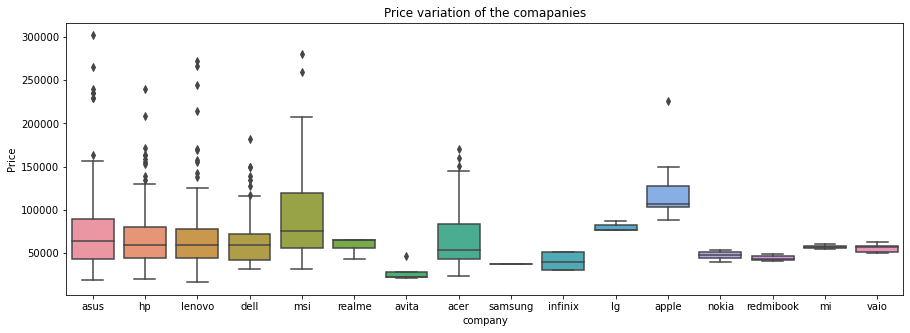

In [142]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["company"], y = df_visualize["Price"])
plt.title("Price variation of the comapanies")
plt.show()

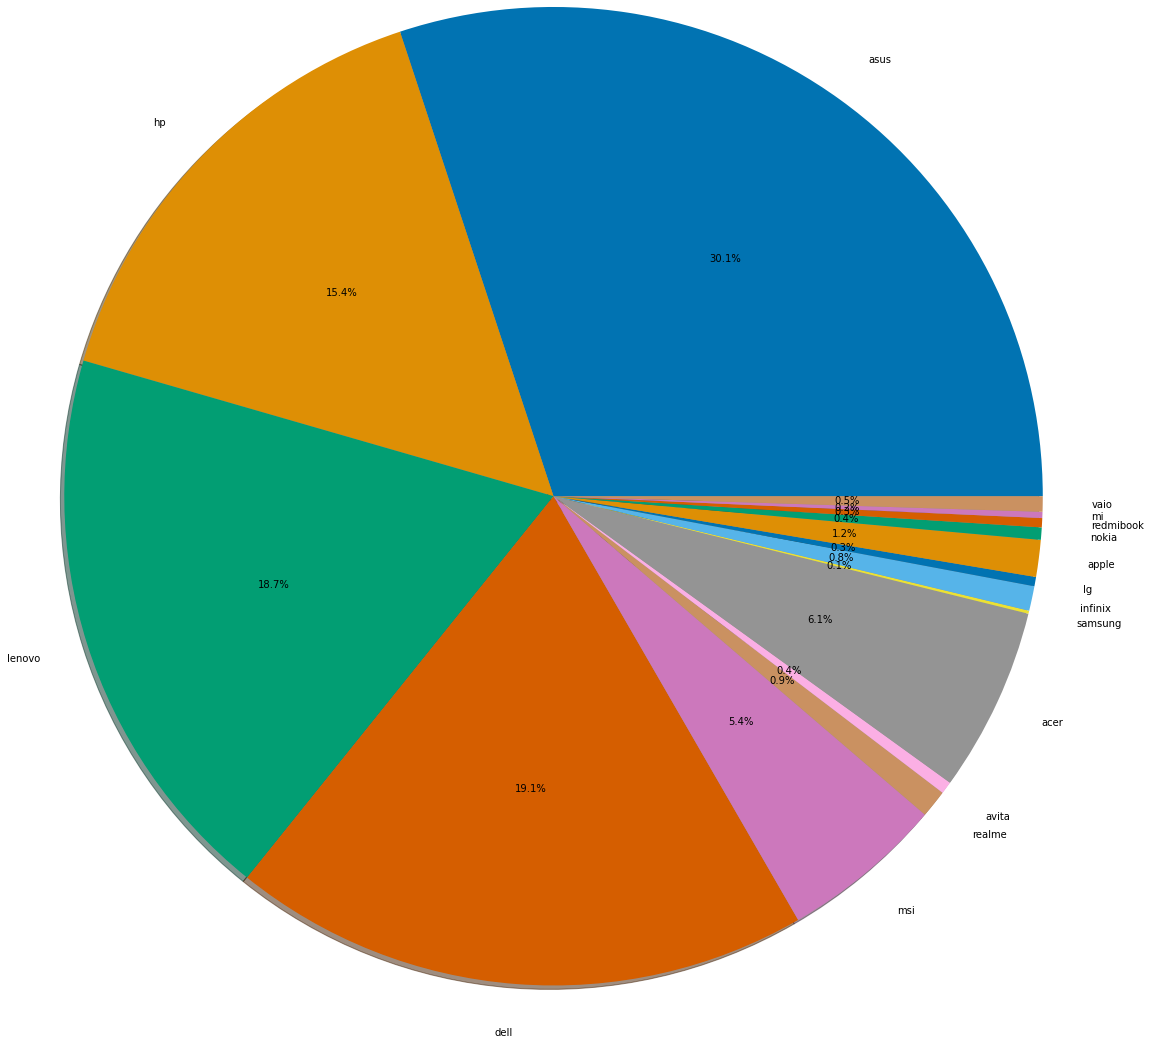

In [143]:
comp_strength = {}

for c in df1["company"].unique():
    comp_strength[inv_comp_dict[c]] = len(df1[df1["company"] == c])


fig = plt.figure(figsize=(9,9))
colors = sns.color_palette('colorblind')[0:len(comp_strength)]
plt.pie(list(comp_strength.values()) ,labels=comp_strength.keys(), shadow=True, autopct="%.1f%%",radius=2.5, colors = colors)
plt.show()

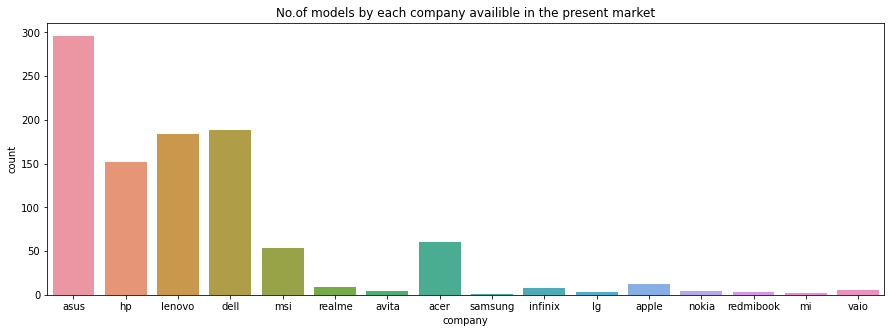

In [144]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x = df_visualize["company"])
plt.title("No.of models by each company availible in the present market")
plt.show()

In [145]:
q = '''SELECT company, COUNT(*) AS count FROM df_visualize GROUP BY company ORDER BY count DESC LIMIT 5;
    '''
print(sqldf(q))

  company  count
0    asus    296
1    dell    188
2  lenovo    184
3      hp    152
4    acer     60


# OS price variation

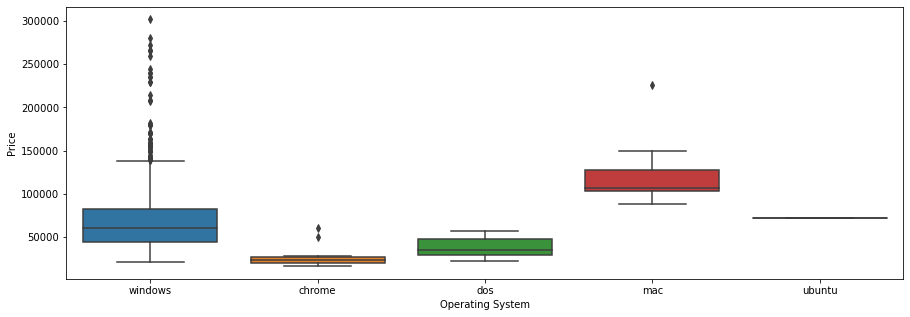

In [146]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["Operating System"], y = df_visualize["Price"])
plt.show()

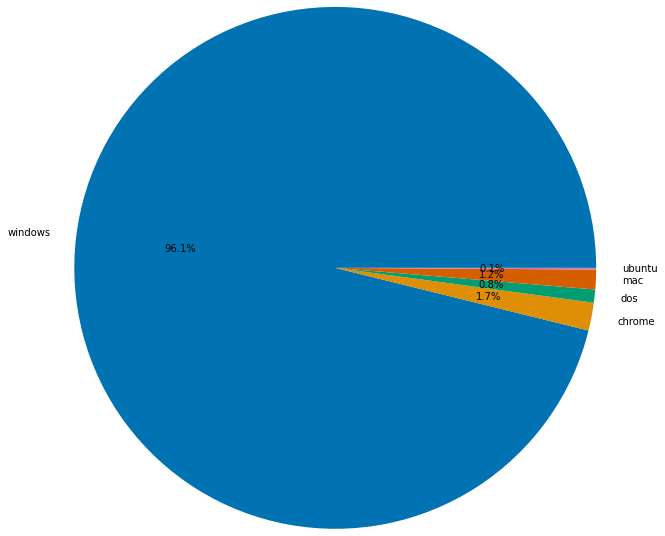

In [147]:
OS_strength = {}

for c in df1["Operating System"].unique():
    OS_strength[inv_os_dict[c]] = len(df1[df1["Operating System"] == c])
    
fig = plt.figure(figsize=(6,6))
colors = sns.color_palette('colorblind')[0:len(OS_strength)]
plt.pie(list(OS_strength.values()) ,labels=OS_strength.keys(),radius=2, colors = colors,  autopct="%.1f%%")
plt.show()


We could see that, the MAC OS, or apple laptops are generally higher priced than the other ones, while Windows OS is the most availible in the market with a lot of price variation

# Weight of the laptops availible in the market

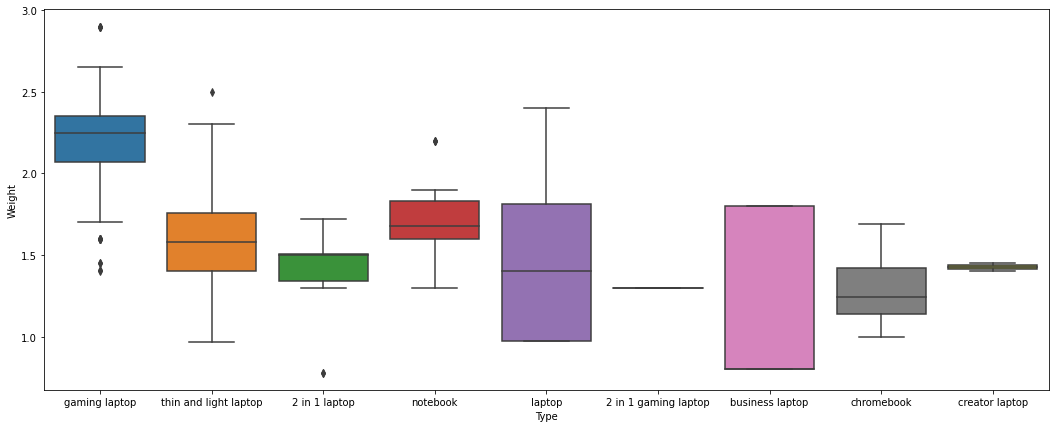

In [148]:
fig = plt.figure(figsize = (18,7))
sns.boxplot(y = df_visualize["Weight"], x = df_visualize["Type"])
plt.show()

In [149]:
q = '''SELECT * FROM df_visualize WHERE Weight = (SELECT MIN(Weight) FROM df_visualize)
    '''
sqldf(q)

,Price,Type,Dedicated Graphic Memory Capacity,Processor Brand,Processor Name,SSD,RAM,Expandable Memory,Operating System,Touchscreen,Screen Size,Weight,max_res,gpu_brand,company,Storage,battery_back,gpu_processor
0,42990,2 in 1 laptop,0,intel,pentium quad core,0,4,0,windows,1,13.3,0.78,1080,none,asus,128,5.0,intel uhd
1,54990,2 in 1 laptop,0,intel,pentium quad core,1,8,0,windows,1,13.3,0.78,1080,none,asus,256,5.0,intel uhd


In [150]:
q = '''SELECT * FROM df_visualize WHERE Weight = (SELECT MAX(Weight) FROM df_visualize)
    '''
sqldf(q)

,Price,Type,Dedicated Graphic Memory Capacity,Processor Brand,Processor Name,SSD,RAM,Expandable Memory,Operating System,Touchscreen,Screen Size,Weight,max_res,gpu_brand,company,Storage,battery_back,gpu_processor
0,234990,gaming laptop,8192,intel,core i9,1,32,1,windows,0,17.3,2.9,1440,nvidia,asus,1000,2.0,nvidia geforce rtx 3070 ti
1,158270,gaming laptop,8192,intel,core i7,1,16,1,windows,0,15.6,2.9,1080,nvidia,msi,1000,2.0,nvidia geforce rtx 3070
2,234990,gaming laptop,8192,intel,core i9,1,32,1,windows,0,17.3,2.9,1440,nvidia,asus,1000,2.0,nvidia geforce rtx 3070 ti
3,158270,gaming laptop,8192,intel,core i7,1,16,1,windows,0,15.6,2.9,1080,nvidia,msi,1000,2.0,nvidia geforce rtx 3070
4,179990,gaming laptop,8192,intel,core i7,1,16,0,windows,0,17.3,2.9,1080,nvidia,msi,1000,2.0,nvidia geforce rtx 3070


As we can see, the gaming laptops have the highest weight overall and the 2 in ones are the lightest ones, Also, the heaviest laptops are all of the type gaming type which weigh about 3 kgs!

# GPU memory capacity and price variation

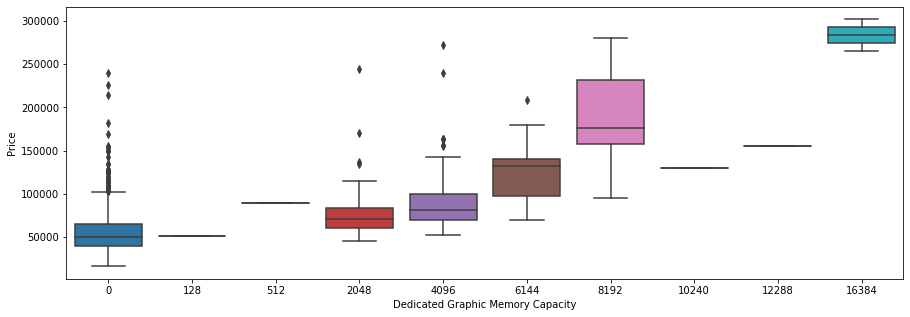

In [151]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["Dedicated Graphic Memory Capacity"], y = df_visualize["Price"])
plt.show()

Here, for the laptops with GPU memory > 2GB, there's a +ve correlation with price

In [152]:
q = '''SELECT "Dedicated Graphic Memory Capacity" as gpu_cap, COUNT(*) AS num_models, AVG(Price) AS avg_price FROM df_visualize 
    WHERE "Dedicated Graphic Memory Capacity" >= 2048 
    GROUP BY "Dedicated Graphic Memory Capacity" 
    ORDER BY avg_price 
    '''
gmem_df = sqldf(q)
gmem_df

,gpu_cap,num_models,avg_price
0,2048,59,78405.220339
1,4096,185,89197.221622
2,6144,39,123931.025641
3,10240,1,129990.000000
4,12288,1,154990.000000
5,8192,20,189233.400000
6,16384,2,283490.000000


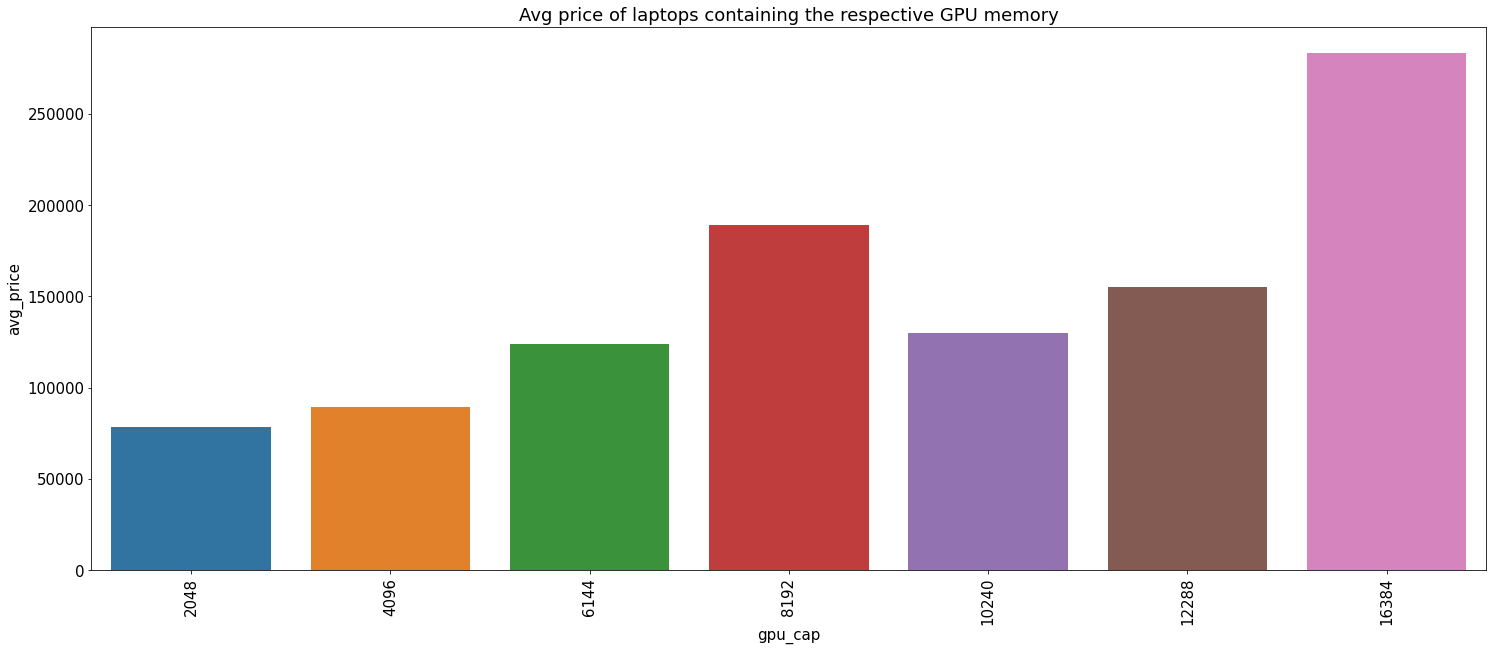

In [153]:
fig = plt.figure(figsize = (25,10))
plt.rcParams['font.size'] = 15
plt.xticks(rotation=90)
sns.barplot(x = gmem_df["gpu_cap"], y = gmem_df["avg_price"])
plt.title("Avg price of laptops containing the respective GPU memory")
plt.show()

Note that, the GPU capacity isn't a very great indicator of the Graphics performace of a laptop as the no.of cores and specific model actually matters in terms of performance.

# GPU brands and thier costs

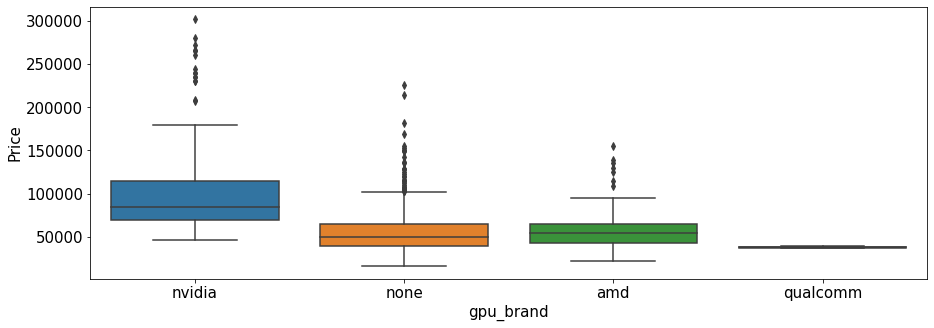

In [154]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["gpu_brand"], y = df_visualize["Price"])
plt.show()

# Here, none denotes intel chipsets

# Screen resolution and price variation

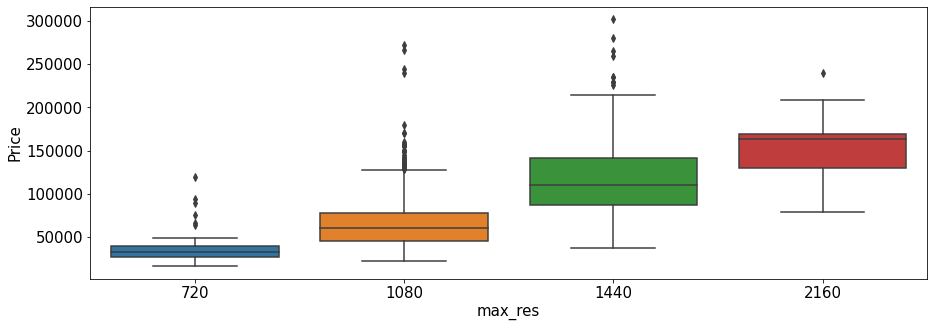

In [155]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["max_res"], y = df_visualize["Price"])
plt.show()

In [156]:
q = '''SELECT max_res, COUNT(*) as num_models
FROM df_visualize GROUP BY max_res ORDER BY num_models desc
    ''' 

sres_df = sqldf(q)
print(sres_df)

   max_res  num_models
0     1080         806
1      720          84
2     1440          81
3     2160          13


In [157]:
int(sres_df[sres_df["max_res"] == 1080]["num_models"])

806

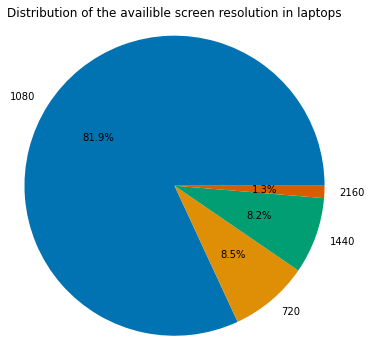

In [158]:
sres = {}

for c in list(sres_df["max_res"].unique()):
    sres[c] = int(sres_df[sres_df["max_res"] == c]["num_models"])
    
fig = plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 10
plt.title("Distribution of the availible screen resolution in laptops")
colors = sns.color_palette('colorblind')[0:len(sres)]
plt.pie(list(sres.values()) ,labels=sres.keys(),autopct="%.1f%%" ,radius=1.15, colors = colors)
plt.show()

In [159]:
print("The cheapest laptop with a 4K resolution is :- ")

ind = df_visualize[df_visualize["Price"] == min(df_visualize[df_visualize["max_res"] == 2160]["Price"])].index
print("Price :- ",np.array(df2["Price"].iloc[ind])[0])
df2.iloc[ind]

The cheapest laptop with a 4K resolution is :- 
Price :-  ?79,190


,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,...,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
543,543,https://www.flipkart.com/hp-envy-intel-evo-cor...,hp hp envy intel evo core i5 11th gen - (16 gb...,nan,"?79,190","laptop, power adaptor, user guide, warranty do...",14-eb0019tx,389u8pa#acj,14-eb0019tx,hp envy intel evo,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [160]:
print("The most expensive laptop with a 4K resolution is :- ")


ind = df_visualize[df_visualize["Price"] == max(df_visualize[df_visualize["max_res"] == 2160]["Price"])].index

print("Price :- ",np.array(df2["Price"].iloc[ind])[0])

df2.iloc[ind]

The most expensive laptop with a 4K resolution is :- 
Price :-  ?2,39,990


,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,...,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
735,735,https://www.flipkart.com/asus-rog-flow-x13-202...,asus rog flow x13 (2021) ryzen 9 octa core 598...,5.0,"?2,39,990","laptop, power adaptor, user guide, gv 301 slee...",gv301qh-k5459ts,90nr06c5-m10980,nan,rog flow x13 (2021),...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Amount of RAM and it's price variation

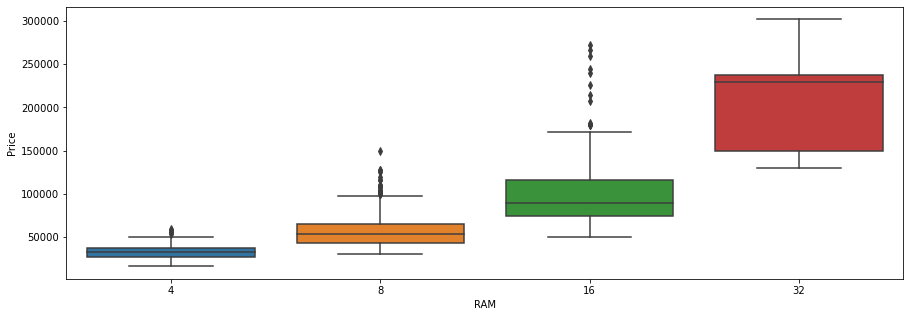

In [161]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = df_visualize["RAM"], y = df_visualize["Price"])
plt.show()

We could clearly see a +ve correlation with the amount of RAM and price, which is pretty obvious as main memory is much expensive than the secondary memory

In [162]:
q = '''SELECT RAM, COUNT(*) as num_models FROM df_visualize GROUP BY RAM ORDER BY num_models DESC;
'''
print(sqldf(q))

   RAM  num_models
0    8         557
1   16         306
2    4         106
3   32          15


As we can see ,there are a majority of 8GB RAM models in the present market

# Most frequent CPU processors which are used in the market (May-June 2022)

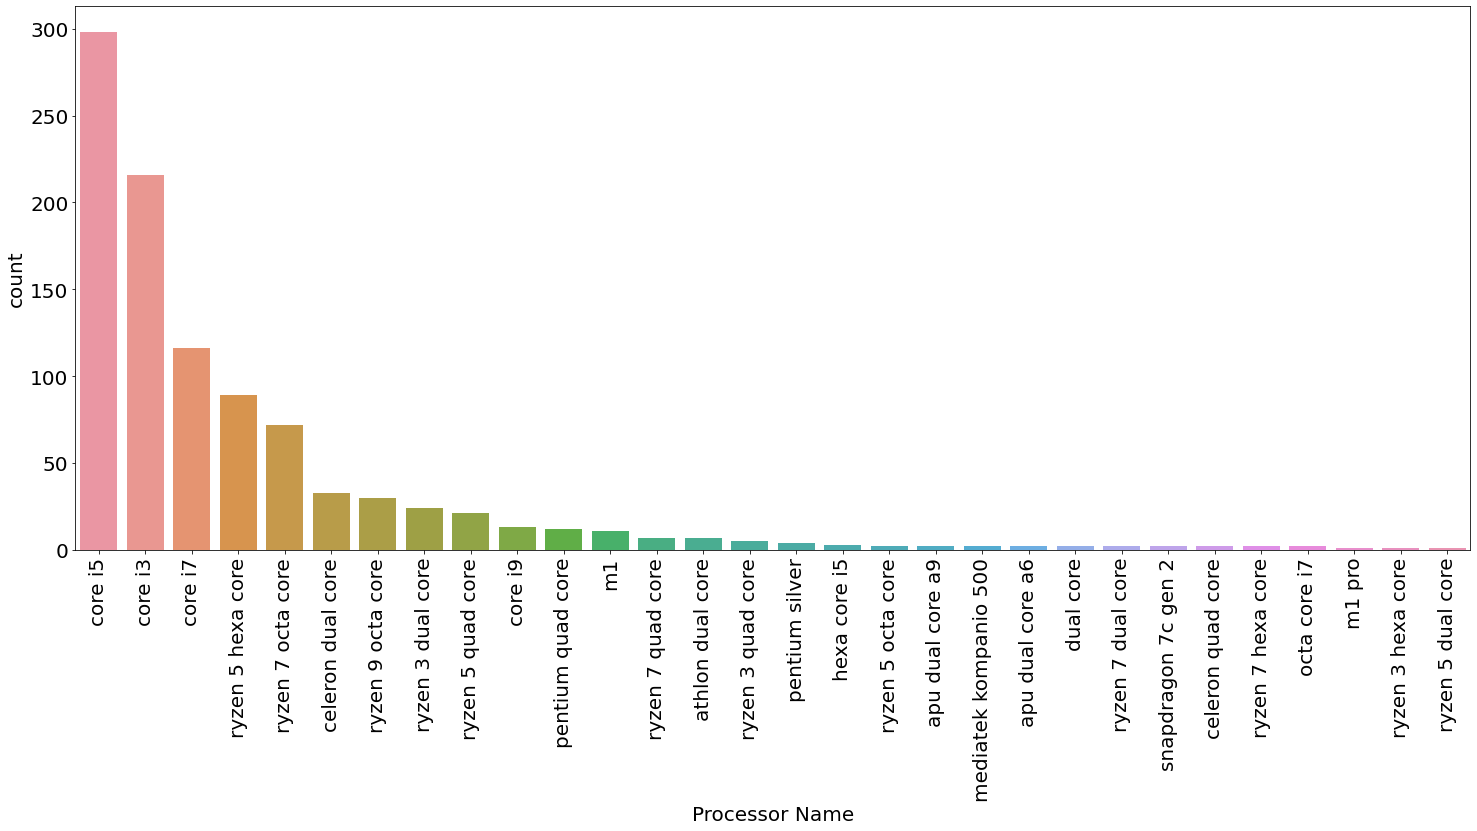

In [163]:
fig = plt.figure(figsize = (25,10))
plt.rcParams['font.size'] = 20
plt.xticks(rotation=90)
sns.countplot(x = df_visualize["Processor Name"], order = df_visualize["Processor Name"].value_counts().index)
plt.show()

# Price variation of CPU processors which are availible in the market (July-May 2022)

In [164]:
q = '''SELECT "Processor Name", AVG(Price) AS avg_cpu_price, COUNT(*) AS num_models FROM df_visualize
        GROUP BY "Processor Name" ORDER BY avg_cpu_price DESC'''
cpu_avg_price_df = sqldf(q)
cpu_avg_price_df

,Processor Name,avg_cpu_price,num_models
0,m1 pro,225990.000000,1
1,core i9,211236.769231,13
2,ryzen 9 octa core,132757.333333,30
3,core i7,116338.663793,116
4,m1,110171.818182,11
5,octa core i7,96290.000000,2
6,ryzen 7 octa core,89038.388889,72
7,ryzen 7 dual core,82980.000000,2
8,ryzen 7 hexa core,80060.000000,2
9,ryzen 7 quad core,71985.571429,7


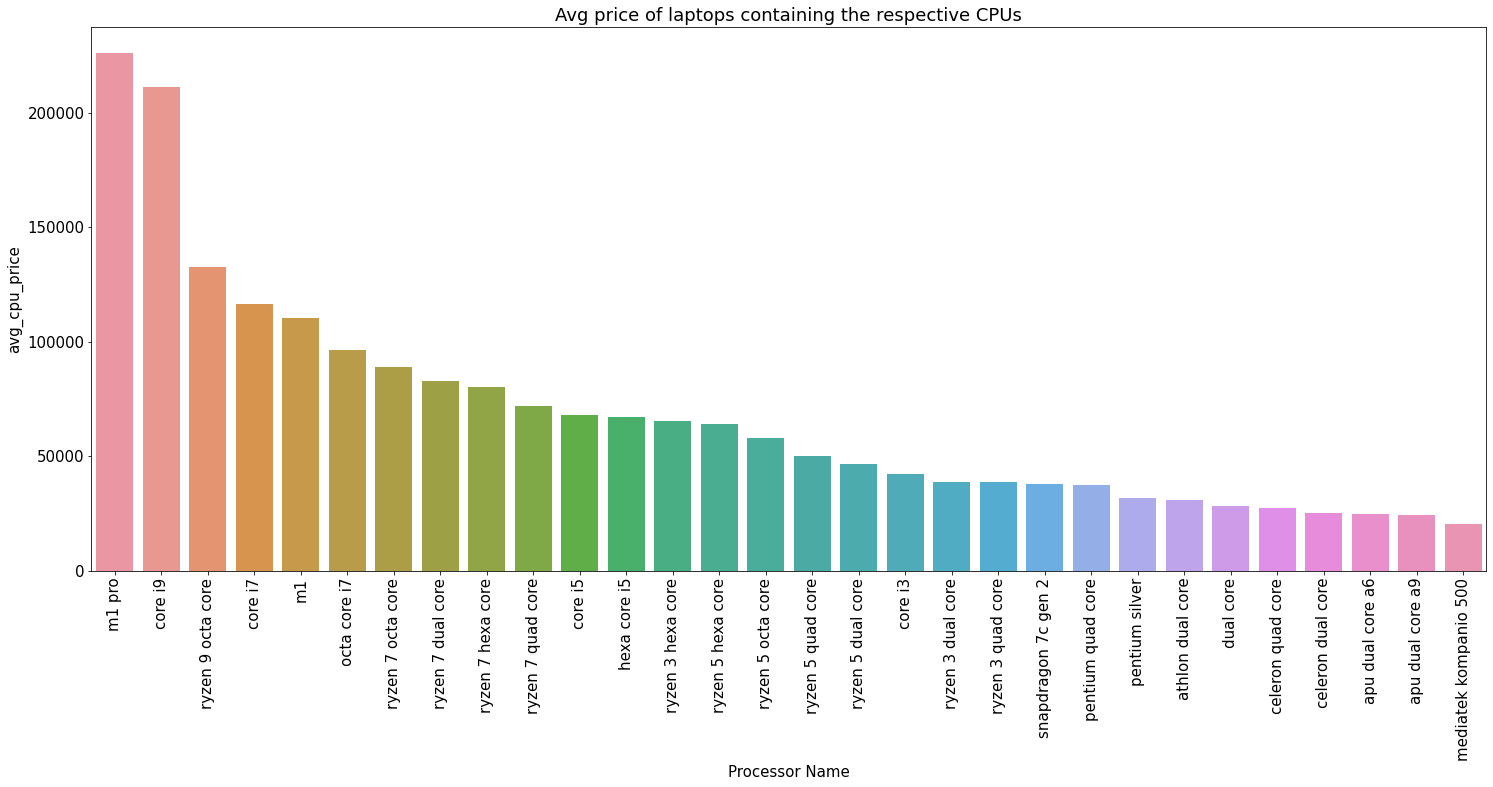

In [165]:
fig = plt.figure(figsize = (25,10))
plt.rcParams['font.size'] = 15
plt.xticks(rotation=90)
sns.barplot(x = cpu_avg_price_df["Processor Name"], y = cpu_avg_price_df["avg_cpu_price"])
plt.title("Avg price of laptops containing the respective CPUs")
plt.show()

As we can see, the price of the most used processors is around Rs.50000, and then the count of costly processors decreases, resembling a skewed distribution

# Most frequent GPU processors which are used in the market (July-May 2022)

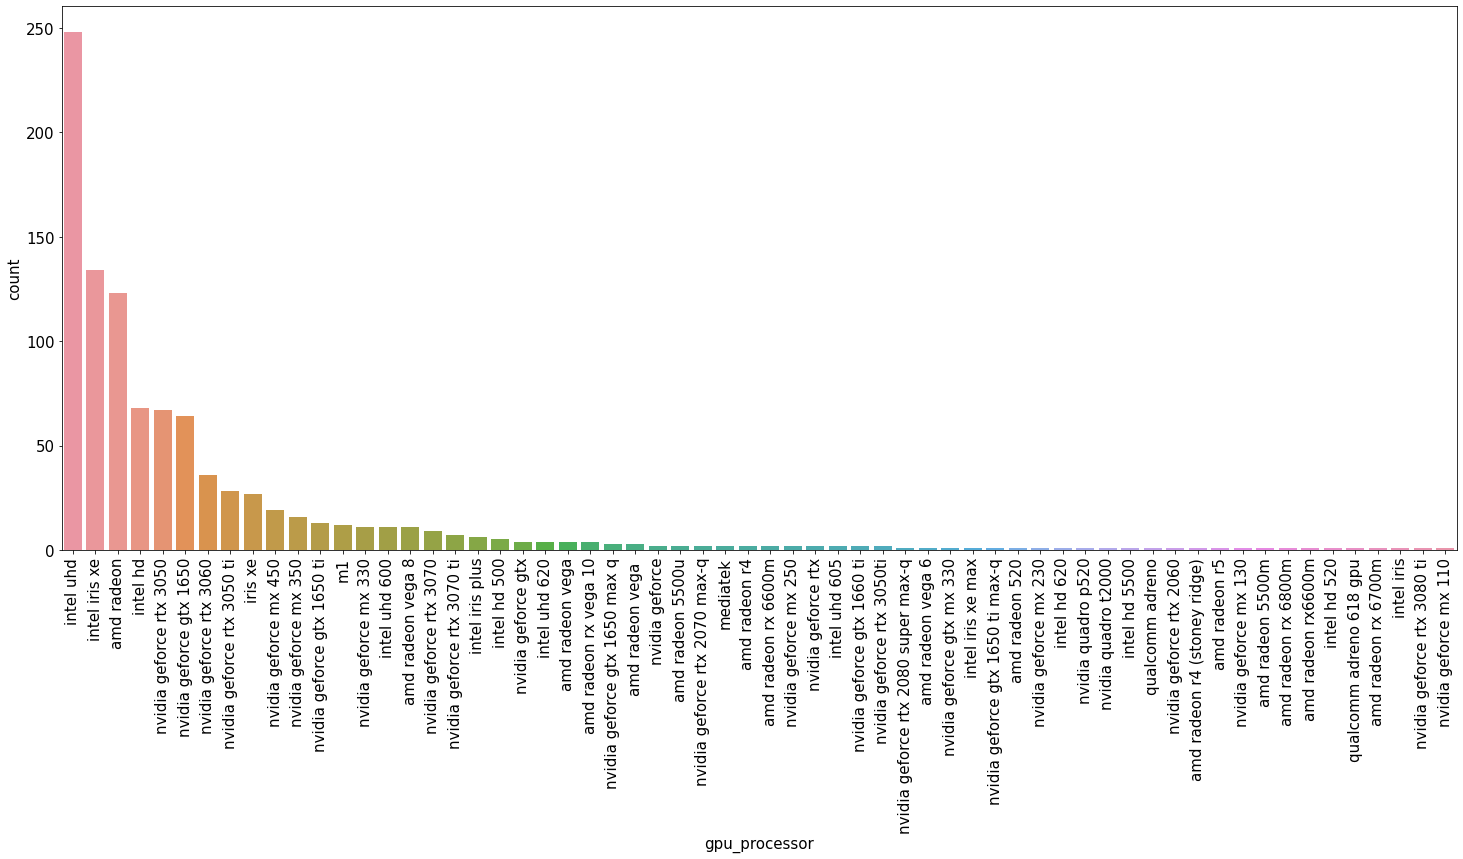

In [166]:
fig = plt.figure(figsize = (25,10))
plt.rcParams['font.size'] = 15
plt.xticks(rotation=90)
sns.countplot(x = df_visualize["gpu_processor"], order = df_visualize["gpu_processor"].value_counts().index)
plt.show()

In [167]:
q = '''SELECT gpu_processor, AVG(Price) AS avg_gpu_price, COUNT(*) AS num_models FROM df_visualize
        GROUP BY gpu_processor ORDER BY avg_gpu_price DESC'''
gpu_avg_price_df = sqldf(q)
gpu_avg_price_df


,gpu_processor,avg_gpu_price,num_models
0,nvidia geforce rtx 3080 ti,301990.000000,1
1,nvidia quadro t2000,272000.000000,1
2,nvidia geforce rtx 2080 super max-q,265998.000000,1
3,nvidia geforce rtx 3070 ti,247847.142857,7
4,nvidia quadro p520,244801.000000,1
...,...,...,...
57,amd radeon r5,27090.000000,1
58,intel uhd 605,26990.000000,2
59,intel uhd 600,24363.636364,11
60,intel hd 500,21491.800000,5


# Price variation of GPU processors which are availible in the market (July-May 2022)

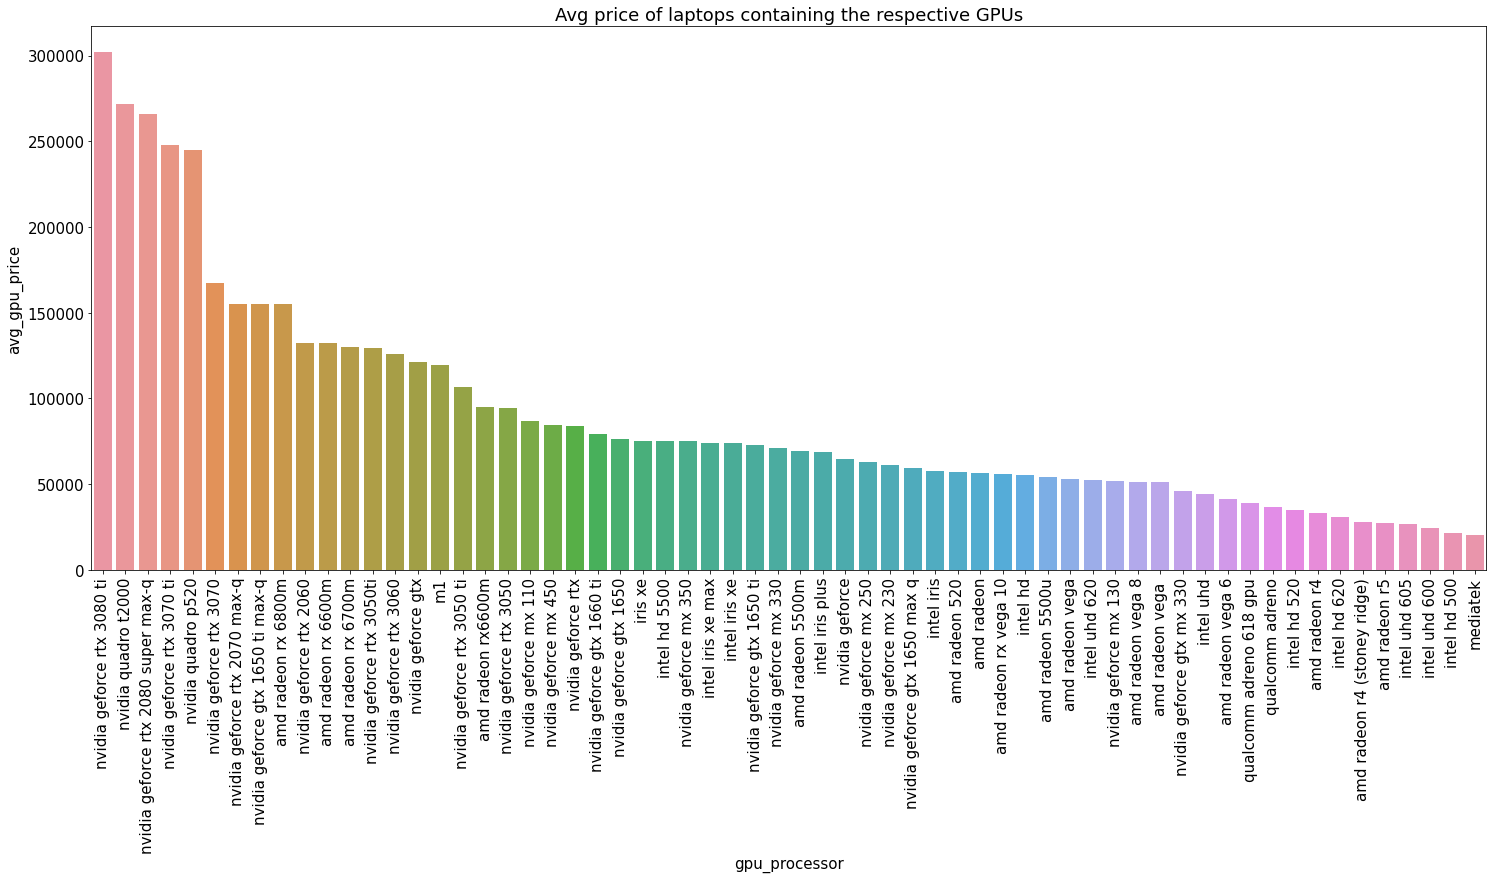

In [168]:
fig = plt.figure(figsize = (25,10))
plt.rcParams['font.size'] = 15
plt.xticks(rotation=90)
sns.barplot(x = gpu_avg_price_df["gpu_processor"], y = gpu_avg_price_df["avg_gpu_price"])
plt.title("Avg price of laptops containing the respective GPUs")
plt.show()

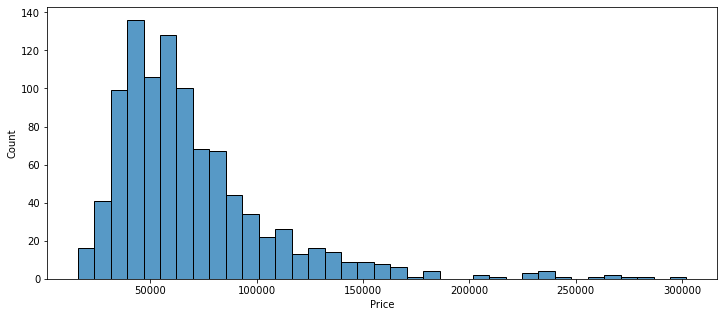

69849.69512195123 38674.42571657196


In [169]:
fig = plt.figure(figsize=(12,5))
plt.rcParams['font.size'] = 10
sns.histplot(df1["Price"])

plt.show()
print(np.mean(df1["Price"]),np.std(df1["Price"]))

We can clearly see that the price variation is skewed and not normally distributed, i.e higher priced laptops tend to occur less frequently than mean priced laptops

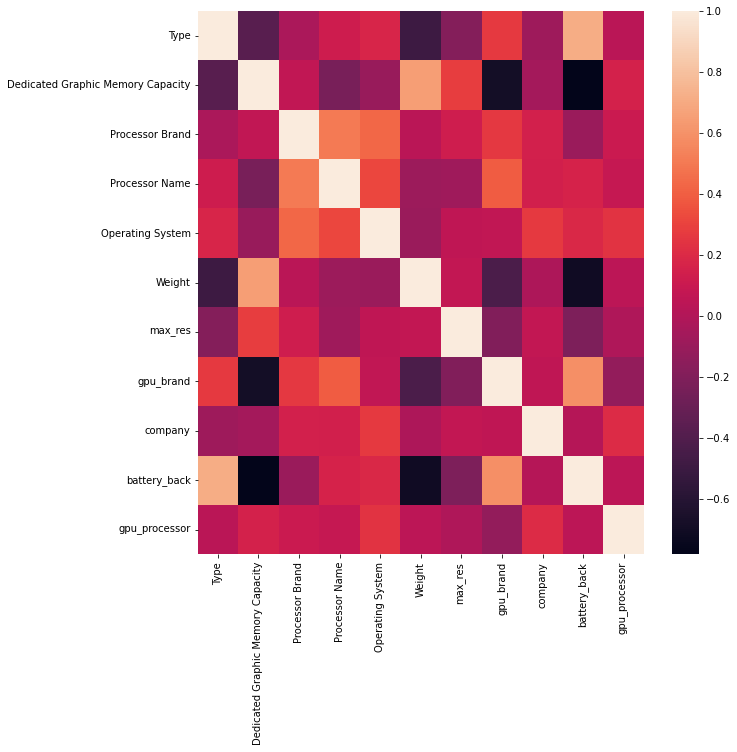

In [170]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr())
# corr = df1.corr()
plt.show()
# We see that not many features are highly correlated.